# **STUDENT PREFORMANCE ANALYSIS PROJECT**

# ***✅ STEP 1: Load and Inspect the Dataset***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')
df.head()

# Check shape and column names
df.shape
df.columns

# Basic info about data types and nulls
df.info()

# Summary statistics
df.describe()

# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# ***✅ STEP 2: Data Cleaning & Feature Engineering***

In [ ]:
# Checking Missing Values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [ ]:
# Create a New Column: average_score
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df[['math_score', 'reading_score', 'writing_score', 'average_score']].head()

,math_score,reading_score,writing_score,average_score
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


In [ ]:
# Create a Performance Category Column
def performance_cluster(score):
    if score >= 85:
        return 'High'
    elif score >= 70:
        return 'Medium'
    else:
        return 'Low'
df['performance_cluster'] = df['average_score'].apply(performance_cluster)

In [ ]:
# Exporting Cleaned Data
df.to_csv('cleaned_student_data.csv', index=False)

# ***STEP 3: EDA QUESTIONS***

**Q1: Which parental education level is linked with the highest average math score?**

In [ ]:
# Answer To Q1
df.groupby('parental_level_of_education')['math_score'].mean().sort_values(ascending=False)

,math_score
parental_level_of_education,
master's degree,69.745763
bachelor's degree,69.389831
associate's degree,67.882883
some college,67.128319
some high school,63.497207
high school,62.137755


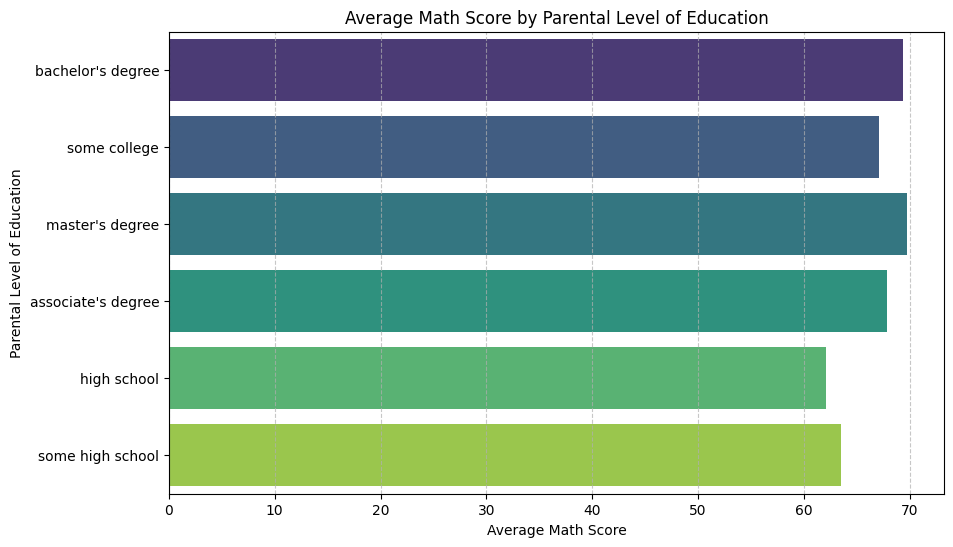

In [ ]:
# Visualized Answer To Q1
plt.figure(figsize=(10,6))
sns.barplot(data=df,
            x='math_score',
            y='parental_level_of_education',
            hue='parental_level_of_education',
            estimator='mean',
            errorbar=None,
            legend=False,
            palette='viridis')

plt.title('Average Math Score by Parental Level of Education')
plt.xlabel('Average Math Score')
plt.ylabel('Parental Level of Education')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Q2: Is there a significant score difference between males and females across all subjects?**

In [ ]:
# Answer To Q2
df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


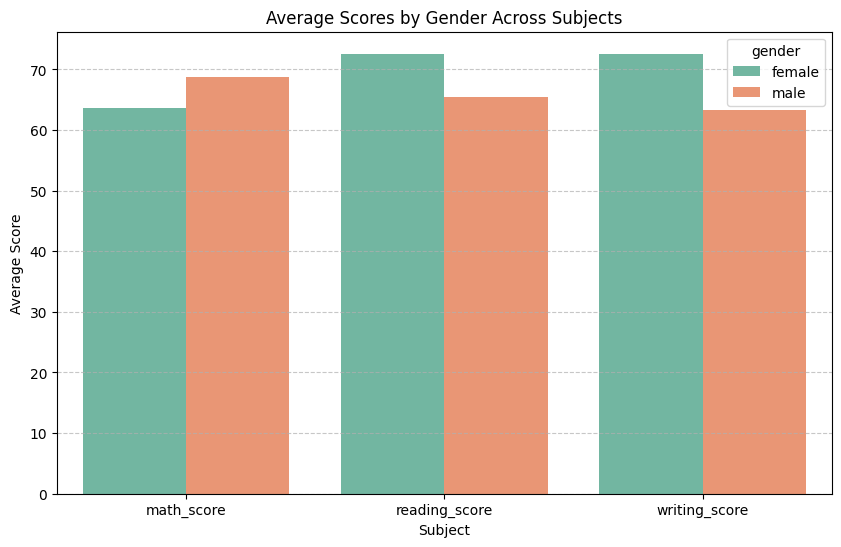

In [ ]:
# Visualized Answer To Q2
plt.figure(figsize=(10,6))
df_melted = df.melt(id_vars='gender', value_vars=['math_score', 'reading_score', 'writing_score'],
                    var_name='Subject', value_name='Score')

sns.barplot(data=df_melted, x='Subject', y='Score', hue='gender', errorbar=None, palette='Set2')
plt.title('Average Scores by Gender Across Subjects')
plt.ylabel('Average Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Q3: How much does completing the test preparation course improve performance in each subject?**

In [ ]:
# Answer To Q3
df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean()


,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


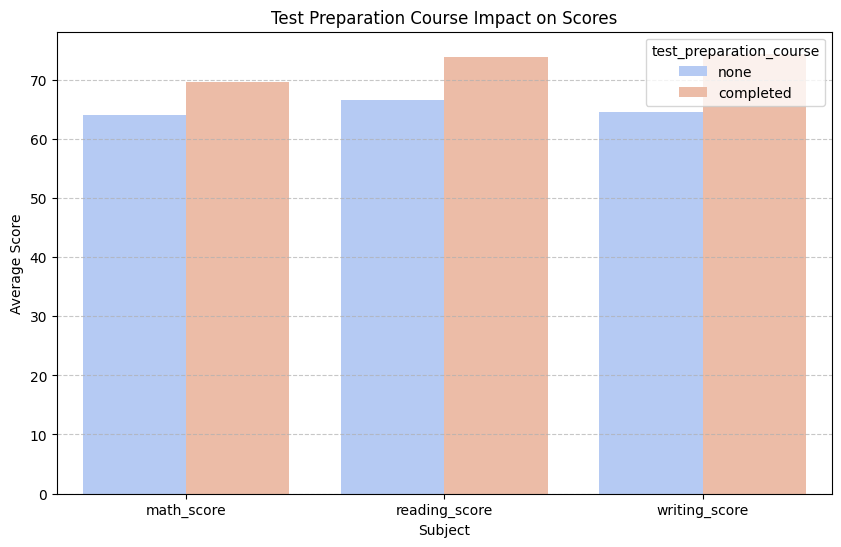

In [ ]:
# Visualized Answer To Q3
plt.figure(figsize=(10,6))
df_prep = df.melt(id_vars='test_preparation_course', value_vars=['math_score', 'reading_score', 'writing_score'],
                  var_name='Subject', value_name='Score')

sns.barplot(data=df_prep, x='Subject', y='Score', hue='test_preparation_course', errorbar=None, palette='coolwarm')
plt.title('Test Preparation Course Impact on Scores')
plt.ylabel('Average Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Q4: Which combination of gender, lunch type, and test preparation status produces the top 10% of scores?**

In [ ]:
# Answer To Q4
# 1. Compute 90th Percentile Threshold
top_10_cutoff = df['average_score'].quantile(0.90)
# 2. Filter Top 10% of Students
top_10_df = df[df['average_score'] >= top_10_cutoff]
#  3. Group by Gender + Lunch + Test Prep
combo_counts = top_10_df.groupby(['gender', 'lunch', 'test_preparation_course']).size().reset_index(name='count')
combo_counts.sort_values(by='count', ascending=False)


,gender,lunch,test_preparation_course,count
3,female,standard,none,31
2,female,standard,completed,29
6,male,standard,completed,20
7,male,standard,none,9
0,female,free/reduced,completed,6
4,male,free/reduced,completed,3
1,female,free/reduced,none,2
5,male,free/reduced,none,2


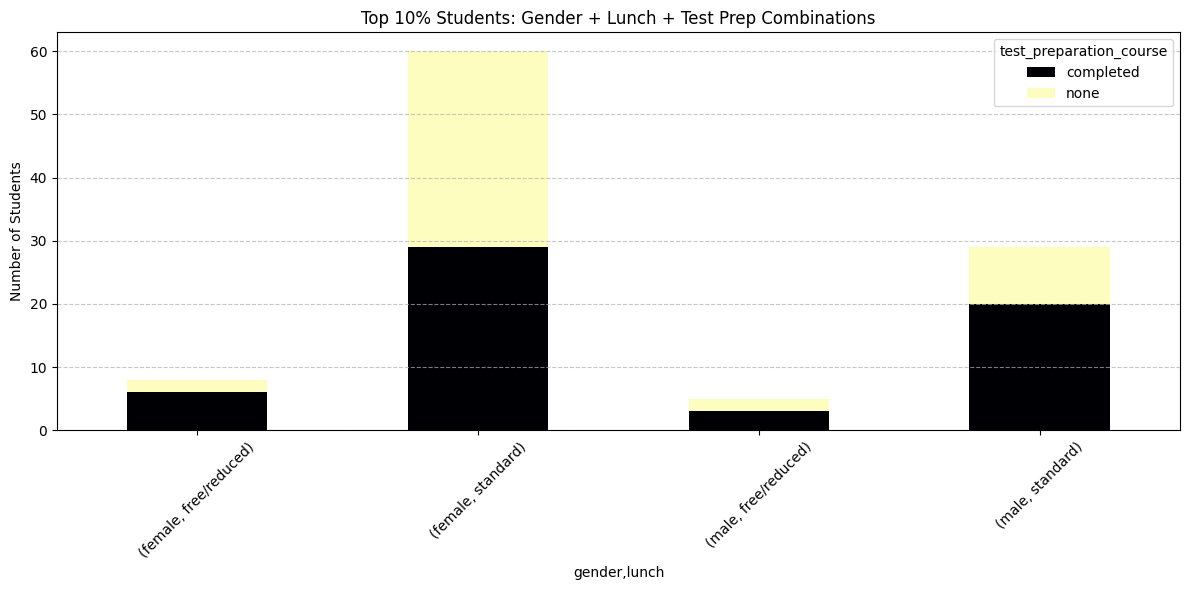

In [ ]:
# Visualized Answer To Q4
pivot = top_10_df.groupby(['gender', 'lunch', 'test_preparation_course']).size().unstack(fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='magma')
plt.title('Top 10% Students: Gender + Lunch + Test Prep Combinations')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Q5: Does lunch type have a uniform impact across all race/ethnicity groups, or does its effect vary?**

In [ ]:
# Answer To Q5
df.groupby(['race/ethnicity', 'lunch'])[['math_score', 'reading_score', 'writing_score']].mean().round(2)

math_score  reading_score  writing_score
race/ethnicity lunch                                                 
group A        free/reduced       55.22          60.56          57.19
               standard           65.98          67.47          66.40
group B        free/reduced       57.43          63.97          61.52
               standard           66.88          69.28          67.93
group C        free/reduced       56.41          63.41          61.41
               standard           68.94          72.27          71.40
group D        free/reduced       61.12          66.43          66.45
               standard           70.92          72.08          72.25
group E        free/reduced       66.56          68.73          67.20
               standard           76.83          74.81          73.15

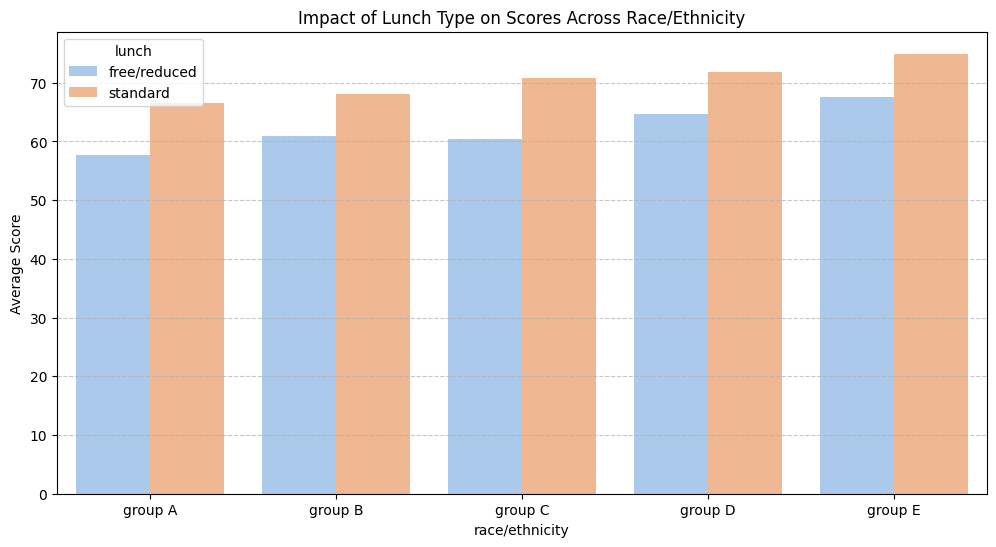

In [ ]:
# Visualized Answer To Q5
race_lunch_avg = df.groupby(['race/ethnicity', 'lunch'])[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
race_lunch_melted = race_lunch_avg.melt(id_vars=['race/ethnicity', 'lunch'],
                                        var_name='Subject', value_name='Average Score')
plt.figure(figsize=(12,6))
sns.barplot(data=race_lunch_melted, x='race/ethnicity', y='Average Score', hue='lunch', errorbar=None, palette='pastel')
plt.title('Impact of Lunch Type on Scores Across Race/Ethnicity')
plt.ylabel('Average Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Q6: What is the correlation between reading and writing scores? Is it stronger than math and writing?**

In [ ]:
# Answer To Q6
correlation = df[['math_score', 'reading_score', 'writing_score']].corr()
correlation

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


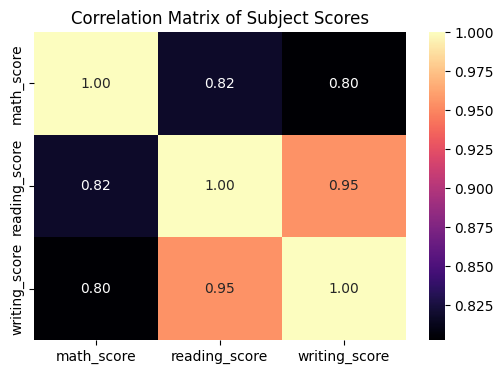

In [ ]:
# Visualized Answer To Q6
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix of Subject Scores')
plt.show()

**Q7: Identify the top 5% performing students and analyze their demographic profiles. What patterns emerge?**

In [ ]:
# Answer To Q7
top_5_cutoff = df['average_score'].quantile(0.95)
top_5_df = df[df['average_score'] >= top_5_cutoff]


In [ ]:
top_5_df['gender'].value_counts(normalize=True) * 100
top_5_df['race/ethnicity'].value_counts(normalize=True) * 100
top_5_df['parental_level_of_education'].value_counts(normalize=True) * 100
top_5_df['test_preparation_course'].value_counts(normalize=True) * 100

,proportion
test_preparation_course,
completed,66.0
none,34.0


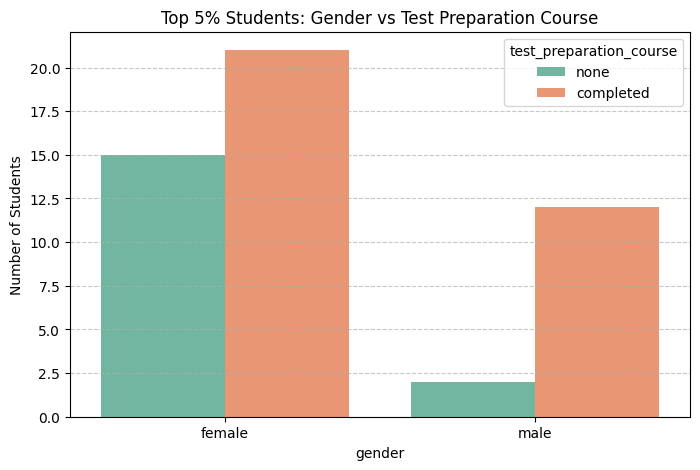

In [ ]:
# Visualized Answer To Q7
plt.figure(figsize=(8, 5))
sns.countplot(data=top_5_df, x='gender', hue='test_preparation_course', palette='Set2')
plt.title('Top 5% Students: Gender vs Test Preparation Course')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Q8: Can we cluster students into performance categories (e.g., low, medium, high) using just Pandas logic?**

    Yes, we can
    We have already created a function named performance_cluster in Featue Engineering Step to cluster students based on performance.

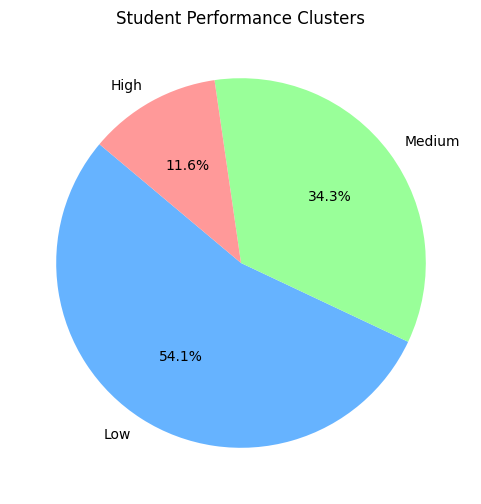

In [ ]:
# Visualization with Pie Chart
df['performance_cluster'] = df['average_score'].apply(performance_cluster)
df['performance_cluster'].value_counts()
plt.figure(figsize=(6,6))
df['performance_cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Student Performance Clusters')
plt.ylabel('')
plt.show()

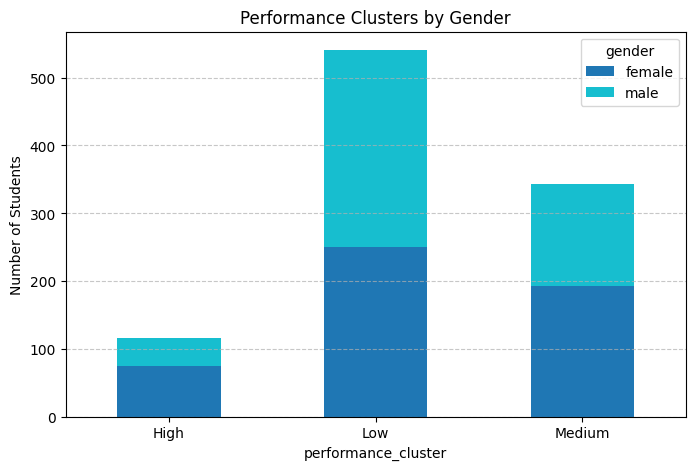

In [ ]:
# Comparing Clusters by Gender (Stacked Bar)
cluster_gender = df.groupby(['performance_cluster', 'gender']).size().unstack()
cluster_gender.plot(kind='bar', stacked=True, figsize=(8,5), colormap='tab10')
plt.title('Performance Clusters by Gender')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ***Enhanced Plots for Student Performance Analysis***

📌 ***1. Violin Plot: Score Distribution by Gender***

    Combines box plot + KDE — shows distribution and density.

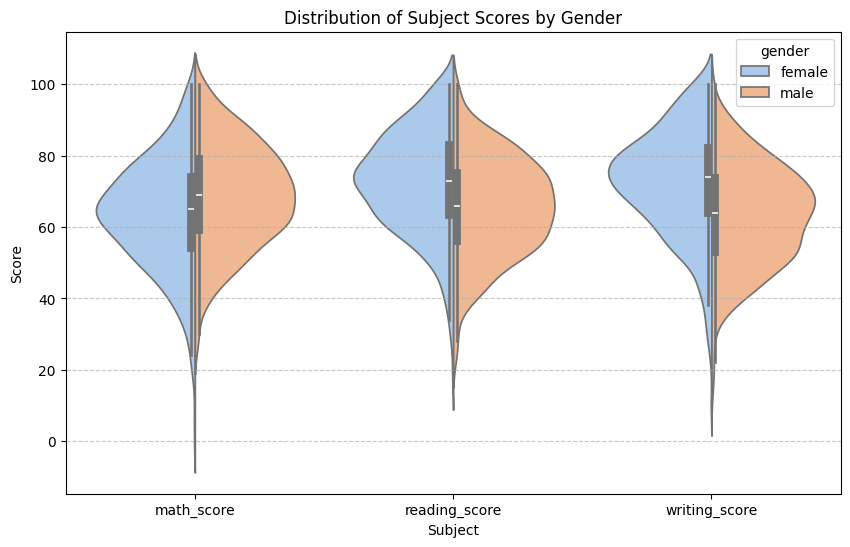

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df.melt(id_vars='gender', value_vars=['math_score', 'reading_score', 'writing_score']),
               x='variable', y='value', hue='gender', split=True, palette='pastel')
plt.title('Distribution of Subject Scores by Gender')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


***📌 2. Swarm Plot: Top Performers’ Score Spread***

    Great for showing exact points with less overlap.

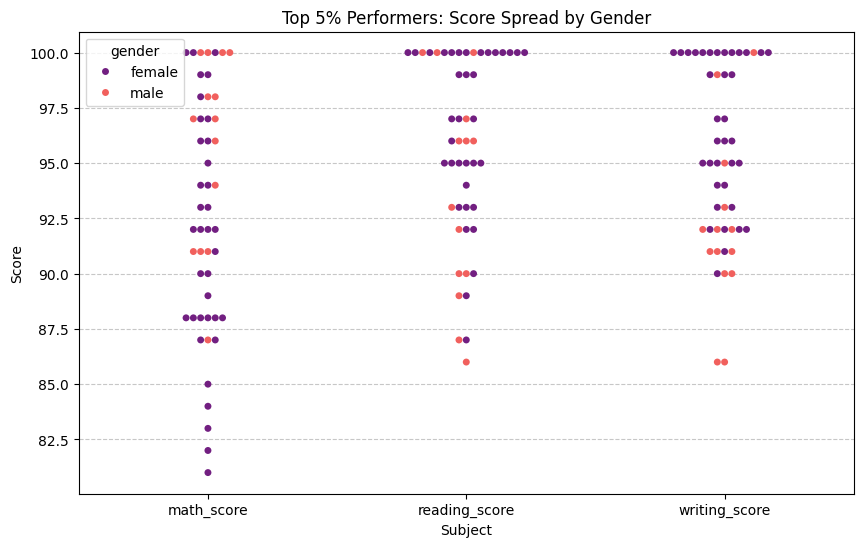

In [ ]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=top_5_df.melt(id_vars='gender', value_vars=['math_score', 'reading_score', 'writing_score']),
              x='variable', y='value', hue='gender', palette='magma')
plt.title('Top 5% Performers: Score Spread by Gender')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


***📌 3. Pair Plot: Visualize Relationships Between Scores***

    Plots scatter plots + KDE diagonals.

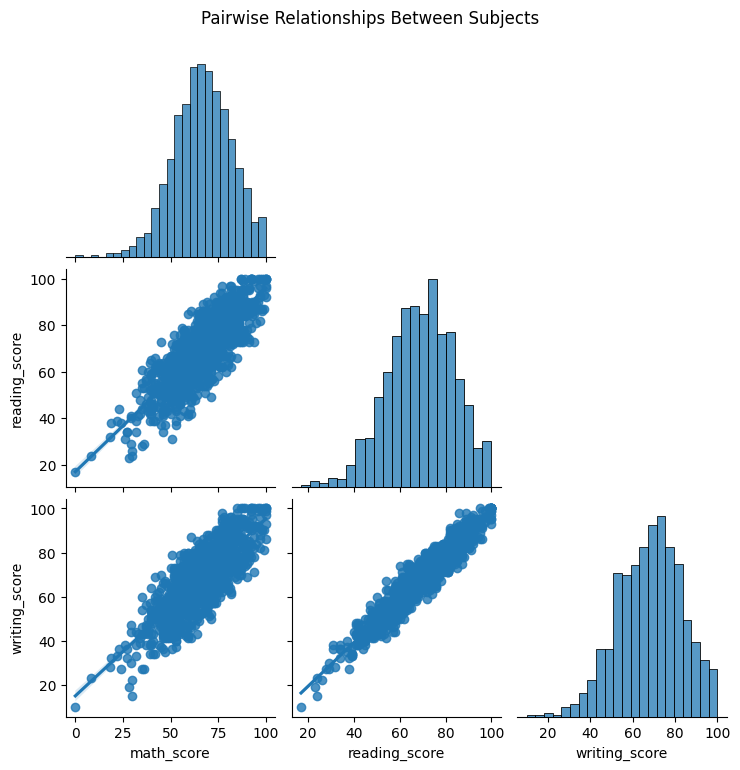

In [ ]:
sns.pairplot(df[['math_score', 'reading_score', 'writing_score']], kind='reg', corner=True)
plt.suptitle('Pairwise Relationships Between Subjects', y=1.02)
plt.show()


***📌 4. Count Plot: Performance Category by Gender***

    Visually compare how genders are distributed in performance bands.

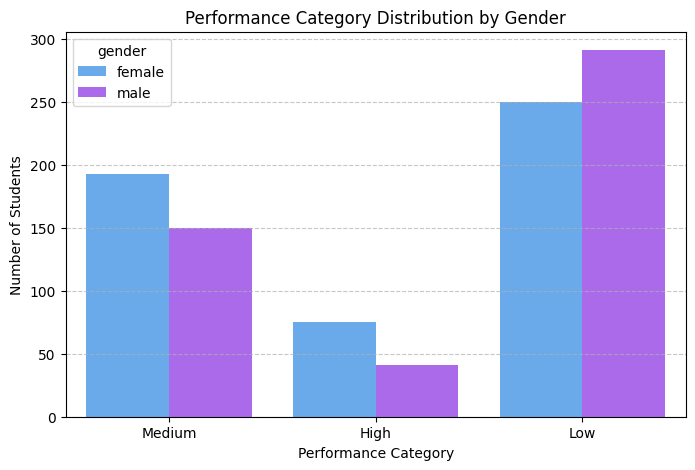

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='performance_cluster', hue='gender', palette='cool')
plt.title('Performance Category Distribution by Gender')
plt.xlabel('Performance Category')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


***📌 5. Facet Grid: Impact of Test Prep on Scores***

    Multi-plot grid based on test preparation status.

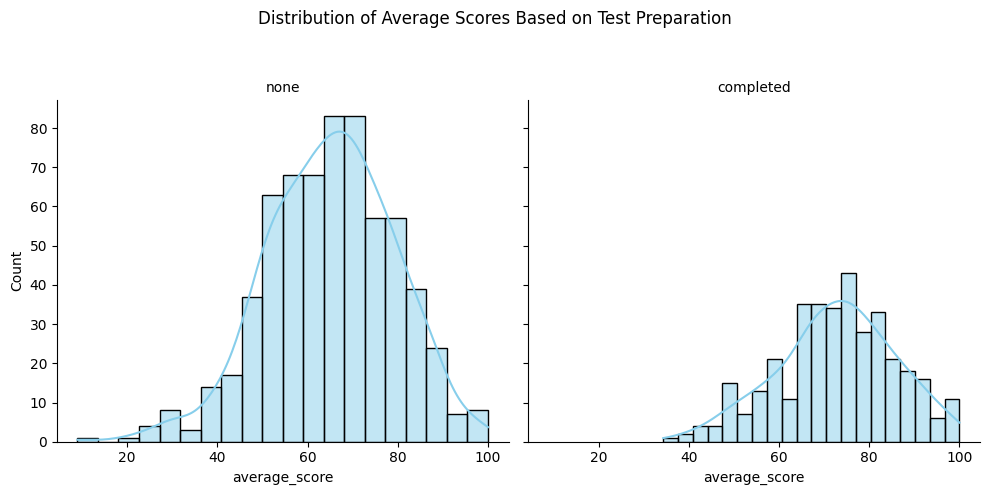

In [ ]:
g = sns.FacetGrid(df, col="test_preparation_course", height=5)
g.map_dataframe(sns.histplot, x="average_score", bins=20, kde=True, color='skyblue')
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Distribution of Average Scores Based on Test Preparation")
plt.show()
